In [1]:
#this is the logistic regression as a neural network.

In [55]:
#importing the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import h5py

%matplotlib inline

print("modules loaded successfully")


modules loaded successfully


In [56]:
#now that the modules are here, let's take in the data using h5py package
train_dataset = h5py.File("datasets/train_catvnoncat1.h5")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) #training set image pixel values
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) #train set labels

test_dataset = h5py.File("datasets/test_catvnoncat1.h5")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) #test set image pixels
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) #test set labels

train_set_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

print("dataset loaded")

dataset loaded


In [57]:
#let's flatten and normalize the data post which we can start our model making

In [58]:
train_set_x_flatten = train_set_x_orig.reshape((train_set_x_orig.shape[0], -1)).T
test_set_x_flatten = test_set_x_orig.reshape((test_set_x_orig.shape[0], -1)).T

#normalize
train_X = train_set_x_flatten/255
test_X = test_set_x_flatten/255

In [59]:
#let's start with the making pof the algorithm we gonna break it into different steps
'''
1. We need to define the neural network architecture
    - this involves figuring out how many neurons should be there
    - the number of layers (in this case it is only one input and one output layer)
2. Initialization
    -the parameter initialization. We can do zeros or random. Let's do random this time
3. forward propagation
    -calculation of the activations
    -calculation of the cost function based on these activations (cross entropy loss in this case)
4. backpropagation
    -this helps in calculation of the dw and db
5. optimization
    -basically using the gradient descent algorithm for updating the values of w and b parameters
6. predictions
    -evaluating the test dataset on the learned parameters
'''

"\n1. We need to define the neural network architecture\n    - this involves figuring out how many neurons should be there\n    - the number of layers (in this case it is only one input and one output layer)\n2. Initialization\n    -the parameter initialization. We can do zeros or random. Let's do random this time\n3. forward propagation\n    -calculation of the activations\n    -calculation of the cost function based on these activations (cross entropy loss in this case)\n4. backpropagation\n    -this helps in calculation of the dw and db\n5. optimization\n    -basically using the gradient descent algorithm for updating the values of w and b parameters\n6. predictions\n    -evaluating the test dataset on the learned parameters\n"

In [60]:
#let's start with it. Let us start with the initialization step
#here we need to initialize the parameters based on the dimensions of the data

def initialize(dims):
    
    #w = np.abs(np.random.randn(dims, 1))
    w = np.zeros((dims, 1))
    b = 0
    
    assert(w.shape == (dims, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w, b

In [61]:
#now we need to start with the propagation step. Since we need to calculate sigmoid, we need to get that
#helper function. Let's make it.

def sigmoid(z):
    
    s = 1/(1 + np.exp(-z))
    
    return s

In [62]:
#now we can start with the propagation. First we are going to do the forward propagation and then the backward
#propagation. Both of these steps will be coded in the propagate() function

def propagate(w, b, X, Y):
    
    m = X.shape[1]
    
    A = sigmoid(np.dot(w.T, X) + b)
    cost = -((np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)))/m)
    
    #back propagation
    dw = (1/m) * np.dot(X, (A - Y).T)
    db = (1/m) * np.sum(A - Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw" : dw, "db" : db}
    
    return grads, cost

In [63]:
#after we have propagated we have gotten the current cost using the current parameters
#these parameters are then updated by optimizing them. This is basically the gradient descent. 

def optimize(w, b, X, Y, num_iterations, learning_rate):
    
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
    
        dw = grads["dw"]
        db = grads["db"]
    
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)
    
        costs.append(cost)
        
        if(i % 100 == 0):
            print(cost)
    
    params = {"w" : w, "b" : b}
    
    grads = {"dw" : dw, "db" : db}
    
    return params, grads, costs

In [64]:
#finally we need to predict our results using the test dataset
def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        
        if A[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1
    
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

In [65]:
#let's put it all together into a model function

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5):
    
    #random initialization of parameters
    w, b = initialize(X_train.shape[0])
    
    #forward propagation and optimization
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    
    #learnt parameters
    w = params["w"]
    b = params["b"]
    
    #prediction
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    d = {"costs" : costs,
        "Y_prediction_test" : Y_prediction_test,
        "Y_prediction_train" : Y_prediction_train,
        "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

0.6931471805599453
0.5956847473191387
0.5619946913415846
0.5364213924623396
0.5152851150897306
0.4970621787944805
0.48094120566847054
0.4664311300201425
0.4532089438915135
0.4410486266433077
0.42978426187404756
0.419289387413833
0.40946469956928017
0.400230339054692
0.3915208293285501
0.3832816248218766
0.3754666778936622
0.36803667456505756
0.3609577237238532
0.3542003626537763
0.3477387887724878
0.34155025669768746
0.3356145984823919
0.32991383717589545
0.3244318721669165
0.3191542204825033
0.3140678022321797
0.30916076125809383
0.30442231413793985
0.2998426222251469
0.29541268255952674
0.2911242343501845
0.2869696783967041
0.28294200732779634
0.27903474493688274
0.27524189320907505
0.2715578858839159
0.2679775475980144
0.26449605781253693
0.26110891886082865
train accuracy: 95.2153110047847 %
test accuracy: 74.0 %


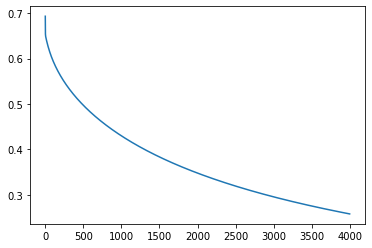

In [70]:
d = model(train_X, train_set_y, test_X, test_set_y, num_iterations = 4000, learning_rate = 0.0009)
plt.plot(d["costs"])
plt.show()